In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from main import get_keywords, get_searchWords
import config
import tweepy
import pandas as pd
import seaborn as sb
from datetime import timedelta

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def get_hashtags(tweet):
    HT = tweet.entities['hashtags']
    if len(HT) != 0:
        return [T['text'] for T in HT]
    return None

def get_usermentions(tweet):
    HT = tweet.entities['user_mentions']
    if len(HT) != 0:
        return [T['screen_name'] for T in HT]
    return None

In [3]:
# AUTH #
auth = tweepy.OAuthHandler(config.CONSUMER_KEY, config.CONSUMER_SECRET)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)

In [4]:
# API #
api = tweepy.API(auth)

In [5]:
# Parametros de busqueda #
search_words = get_searchWords()
date_since = "2019-10-16"

In [6]:
# CURSOR #
tweets = tweepy.Cursor(api.search,
                        q=search_words,
                        lang='es',
                        since=date_since).items(500)

In [7]:
# PROCESSING #
tweets_list = [tweet for tweet in tweets]

users_locs = [[h.created_at, h.user.screen_name, get_usermentions(h), get_hashtags(h), h.user.location] for h in tweets_list]

In [8]:
# DATAFRAME #
twitter_df = pd.DataFrame(data=users_locs,
                              columns=['time', 'user', 'user_mentions', 'hashtags', "location"])
twitter_df['time'] += timedelta(hours=-3)

<IPython.core.display.Javascript object>


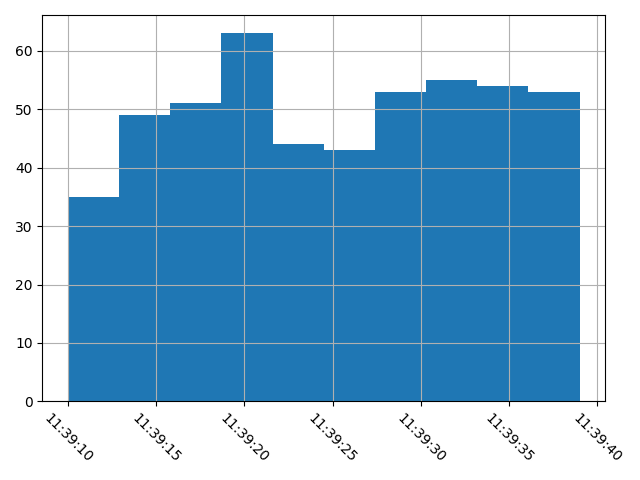

In [9]:
twitter_df['time'].hist()
plt.xticks(rotation=-45)
plt.tight_layout()

In [10]:
twitter_df.head(500)

,time,user,user_mentions,hashtags,location
0,2019-10-24 11:39:39,EndavantS,[KoldoPereda],None,Barcelona
1,2019-10-24 11:39:39,alexliam,None,None,Málaga / Tallahassee
2,2019-10-24 11:39:39,paliduarte_,[ProfetaArgen],None,Neuquén/Cordoba
3,2019-10-24 11:39:39,pspvivianap,[Censelio],None,"Santiago, Chile"
4,2019-10-24 11:39:39,Perdomo_RRR,[ViceVenezuela],"[Noticia, Fitven, Guaira]",
5,2019-10-24 11:39:39,IsaacOsorio_,[GSMALatam],None,Luque
6,2019-10-24 11:39:39,monkydavalos,[Hugobie],None,
7,2019-10-24 11:39:39,ValeCalisto,"[KarolCariola, mbachelet]",None,Valparaiso
8,2019-10-24 11:39:39,ddhhsbf,[TodxsK],None,"Mar del Plata, Argentina"
9,2019-10-24 11:39:39,beatriz77748,[neljulger],None,San Antonio de los Altos


In [11]:
print(tweets_list[1])

Status(_api=<tweepy.api.API object at 0x10660ffd0>, _json={'created_at': 'Thu Oct 24 14:39:39 +0000 2019', 'id': 1187378123702198274, 'id_str': '1187378123702198274', 'text': 'La verdad es que visto lo visto tendría que haber entrado aquí el presidente del gobierno a preguntarnos a nosotros… https://t.co/4RCHTQqInj', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4RCHTQqInj', 'expanded_url': 'https://twitter.com/i/web/status/1187378123702198274', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 767225, 'id_str': '767225', 'name': '𓅓 Alejandro Liam 𓅓', 'screen_name'